# Transfer Learning with TF: Fine Tuning

In [2]:
#gpu
!nvidia-smi

Sun Aug  1 09:45:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#Creating Helper Functions

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-01 09:45:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-01 09:45:39 (83.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import create_tensorboard_callback,plot_loss_curves, unzip_data, walk_through_dir

In [5]:
#lets get some data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2021-08-01 09:45:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   259MB/s    in 0.6s    

2021-08-01 09:45:41 (259 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [7]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [8]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [10]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
for images, labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[  9.          5.          6.       ]
   [  8.642858    4.642857    5.642857 ]
   [  9.780612    5.7806125   6.7806125]
   ...
   [ 10.          8.         13.       ]
   [  8.357142    6.357143    9.357142 ]
   [  7.357143    5.357143    8.357142 ]]

  [[  9.          5.          6.       ]
   [  9.928572    5.9285717   6.9285717]
   [ 11.285714    7.285714    8.285714 ]
   ...
   [  8.341816    6.341816   11.341816 ]
   [  6.9285583   4.9285583   7.9285583]
   [  5.6428223   3.6428223   6.6428223]]

  [[  8.785714    4.785714    5.785714 ]
   [  8.          4.          5.       ]
   [  8.382653    4.382653    5.382653 ]
   ...
   [  7.214286    5.214286   10.214286 ]
   [  7.2704186   5.2704186   8.270418 ]
   [  8.          6.          9.       ]]

  ...

  [[ 24.714176   16.714176   39.714176 ]
   [ 24.75493    16.75493    39.75493  ]
   [ 24.43347    16.43347    39.43347  ]
   ...
   [  3.831645    3.831645    5.831645 ]
   [  2.9846926   2.9846926   4.9846926]
   [ 

In [12]:
#FUNCTIONAL API
base_model = tf.keras.applications.EfficientNetB0(include_top=False)


base_model.trainable=False

inputs = tf.keras.layers.Input(shape=(224,224,3), name='inpu_layer')

# for resnet not for efficientnet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

outputs = tf.keras.layers.Dense(10, activation='softmax',name='output_layer')(x)


model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data,
                                 validation_steps=int(0.25*len(test_data)),
                                 callbacks = [create_tensorboard_callback(dir_name='transfer_learning',
                                                                          experiment_name='10_percent_feature_extraction')])

16711680/16705208 [==============================] - 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20210801-094552
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 42s 315ms/step - loss: 1.8469 - accuracy: 0.4293 - val_loss: 1.3440 - val_accuracy: 0.7155
Epoch 2/5
24/24 [==============================] - 5s 201ms/step - loss: 1.1284 - accuracy: 0.7733 - val_loss: 0.9349 - val_accuracy: 0.7747
Epoch 3/5
24/24 [==============================] - 5s 199ms/step - loss: 0.8297 - accuracy: 0.8147 - val_loss: 0.7635 - val_accuracy: 0.8240
Epoch 4/5
24/24 [==============================] - 5s 204ms/step - loss: 0.6813 - accuracy: 0.8413 - val_loss: 0.6452 - val_accuracy: 0.8487
Epoch 5/5
24/24 [==============================] - 5s 206ms/step - loss: 0.5894 - accuracy: 0.8640 - val_loss: 0.6227 - val_accuracy: 0.8470


In [13]:
model_0.evaluate(test_data)

79/79 [==============================] - 9s 112ms/step - loss: 0.6054 - accuracy: 0.8424


[0.6054080724716187, 0.8424000144004822]

In [14]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [15]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [16]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inpu_layer (InputLayer)      [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


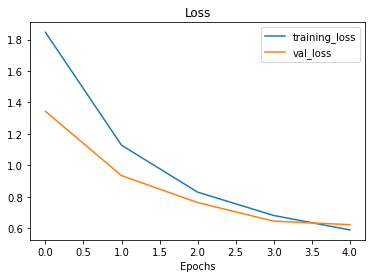

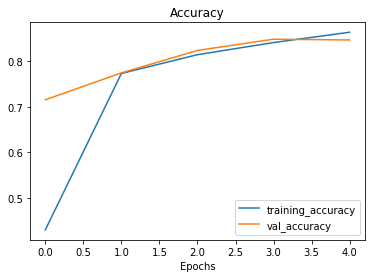

In [17]:
plot_loss_curves(history_10_percent)

In [18]:
#getting feature vector from a trained model

#using 1,4,4,3 to globalavgpooling

input_shape = (1,4,4,3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

#pass thru globalav....

global_avg_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_avg_pooled_tensor}\n")

print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_avg_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [19]:
#replicate
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

## Running a series of Transfer learning experiments

practise with functional api

In [20]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2021-08-01 09:47:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   170MB/s    in 0.8s    

2021-08-01 09:47:13 (170 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [21]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There a

Only 7 images per class!!

In [22]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [23]:
##adding Data augmentation directly into the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


data_augmentation = keras.Sequential([
                                      preprocessing.RandomFlip('horizontal'),
                                      preprocessing.RandomRotation(0.2),
                                      preprocessing.RandomZoom(0.2),
                                      preprocessing.RandomHeight(0.2),
                                      preprocessing.RandomWidth(0.2),
                                      # preprocessing.Rescale(1./255)#for resnet not for effi

], name='data_augmentation')

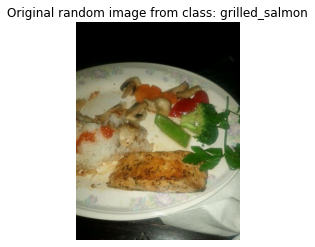

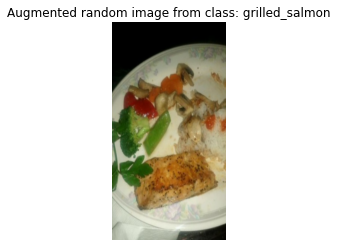

In [24]:
#VIsualize our aug
#view Random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = '10_food_classes_1_percent/train/'+ target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [25]:
#model 1:1% feature extraction with data aug

input_shape=(224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name='input_layer')

x = data_augmentation(inputs)

x=base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = layers.Dense(10,activation='softmax', name='output_layer')(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1_percent = model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_data,
                                validation_steps=int(0.25*len(test_data)),
                                callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                       experiment_name='1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20210801-094717


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
3/3 [==============================] - 11s 3s/step - loss: 2.3913 - accuracy: 0.0286 - val_loss: 2.2049 - val_accuracy: 0.1711
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1702 - accuracy: 0.1143 - val_loss: 2.0834 - val_accuracy: 0.2845
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9796 - accuracy: 0.2714 - val_loss: 1.9808 - val_accuracy: 0.3618
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7859 - accuracy: 0.5429 - val_loss: 1.8692 - val_accuracy: 0.4457
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6627 - accuracy: 0.6571 - val_loss: 1.7989 - val_accuracy: 0.4951


In [26]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [27]:
results_1_percent_data_aug = model_1.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 1.8097 - accuracy: 0.4780


In [28]:
results_1_percent_data_aug

[1.8097187280654907, 0.4779999852180481]

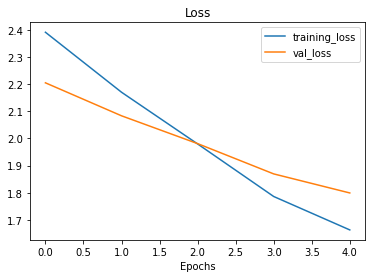

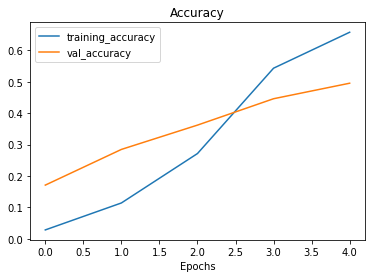

In [29]:
plot_loss_curves(history_1_percent)

In [66]:
#Model 2: Feature extraction with 10% and data aug

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [67]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode='categorical',
                                                                            image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [68]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
                                preprocessing.RandomFlip('horizontal'),
                                preprocessing.RandomHeight(0.2),
                                preprocessing.RandomWidth(0.2),
                                preprocessing.RandomZoom(0.2),
                                # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
                                preprocessing.RandomRotation(0.2),
], name='data_augmentation')

input_shape=(224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name='input_layer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_average_pooling')(x)
outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [69]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling (Glob (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [70]:
checkpoint_path = '10_percent_model_checkpoints_weights/checkpoints.ckpt'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq='epoch',
                                                         verbose=1)

In [71]:
#creating a model checkpoint callback
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25*len(test_data)),
                                          callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                                 experiment_name='10_percent_data_aug'),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20210801-095240
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 16s 469ms/step - loss: 2.0283 - accuracy: 0.3147 - val_loss: 1.4745 - val_accuracy: 0.6628

Epoch 00001: saving model to 10_percent_model_checkpoints_weights/checkpoints.ckpt
Epoch 2/5
24/24 [==============================] - 9s 355ms/step - loss: 1.3926 - accuracy: 0.6760 - val_loss: 1.0322 - val_accuracy: 0.7599

Epoch 00002: saving model to 10_percent_model_checkpoints_weights/checkpoints.ckpt
Epoch 3/5
24/24 [==============================] - 9s 347ms/step - loss: 1.0981 - accuracy: 0.7373 - val_loss: 0.8336 - val_accuracy: 0.8125

Epoch 00003: saving model to 10_percent_model_checkpoints_weights/checkpoints.ckpt
Epoch 4/5
24/24 [==============================] - 8s 324ms/step - loss: 0.9053 - accuracy: 0.7773 - val_loss: 0.7455 - val_accuracy: 0.8224

Epoch 00004: saving model to 10_percent_model_checkpoints_weights/checkpoints.ckpt
Epoch 5/5
24/24 [==============================] - 8s 341ms/step - loss: 0.8112 - accuracy: 0.7813 - val_loss

In [72]:
model_0.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 0.6054 - accuracy: 0.8424


[0.6054080128669739, 0.8424000144004822]

In [73]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 9s 104ms/step - loss: 0.6895 - accuracy: 0.8208


[0.6894878149032593, 0.8208000063896179]

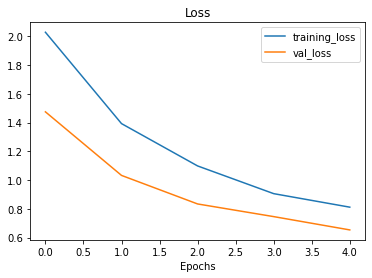

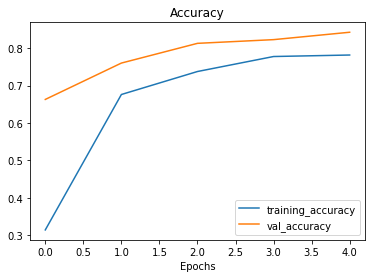

In [74]:
plot_loss_curves(history_10_percent_data_aug)

In [75]:
#loading in checkpointed weights

model_2.load_weights(checkpoint_path)

In [76]:
loaded_weight_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.6895 - accuracy: 0.8208


In [77]:
import numpy as np
# Check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weight_model_results))

array([ True,  True])

In [78]:
print(np.array(results_10_percent_data_aug) - np.array(loaded_weight_model_results))
#very very close

[0. 0.]


In [79]:
#MODEL-3 : FINE TUNING ON 10 percent

model_2.layers

In [80]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fb290e03c90> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fb20e42aed0> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7fb20cbe6890> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7fb20473df10> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fb290a9e890> True


In [81]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [82]:
print(len(model_2.layers[2].trainable_variables))

0


In [83]:
#last 10 layer to trainable

base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

#recompile

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [84]:
for layer_numer, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name,layer.trainable)

236 input_4 False
236 rescaling_3 False
236 normalization_3 False
236 stem_conv_pad False
236 stem_conv False
236 stem_bn False
236 stem_activation False
236 block1a_dwconv False
236 block1a_bn False
236 block1a_activation False
236 block1a_se_squeeze False
236 block1a_se_reshape False
236 block1a_se_reduce False
236 block1a_se_expand False
236 block1a_se_excite False
236 block1a_project_conv False
236 block1a_project_bn False
236 block2a_expand_conv False
236 block2a_expand_bn False
236 block2a_expand_activation False
236 block2a_dwconv_pad False
236 block2a_dwconv False
236 block2a_bn False
236 block2a_activation False
236 block2a_se_squeeze False
236 block2a_se_reshape False
236 block2a_se_reduce False
236 block2a_se_expand False
236 block2a_se_excite False
236 block2a_project_conv False
236 block2a_project_bn False
236 block2b_expand_conv False
236 block2b_expand_bn False
236 block2b_expand_activation False
236 block2b_dwconv False
236 block2b_bn False
236 block2b_activation False


In [85]:
print(len(model_2.trainable_variables))

12


In [86]:
#fine tune for another 5 epochs

fine_tune_epochs = initial_epochs + 5

#refit

history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data = test_data,
                                               validation_steps = int(0.25*len(test_data)),
                                               initial_epoch=history_10_percent_data_aug.epoch[-1],
                                               callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                                      experiment_name='10_percent_fine_tune_last_10')])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20210801-095410
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 15s 401ms/step - loss: 0.6973 - accuracy: 0.7987 - val_loss: 0.5271 - val_accuracy: 0.8470
Epoch 6/10
24/24 [==============================] - 9s 358ms/step - loss: 0.5682 - accuracy: 0.8147 - val_loss: 0.4823 - val_accuracy: 0.8569
Epoch 7/10
24/24 [==============================] - 8s 325ms/step - loss: 0.5309 - accuracy: 0.8333 - val_loss: 0.5263 - val_accuracy: 0.8322
Epoch 8/10
24/24 [==============================] - 8s 332ms/step - loss: 0.4627 - accuracy: 0.8547 - val_loss: 0.4657 - val_accuracy: 0.8586
Epoch 9/10
24/24 [==============================] - 8s 312ms/step - loss: 0.4118 - accuracy: 0.8813 - val_loss: 0.4973 - val_accuracy: 0.8421
Epoch 10/10
24/24 [==============================] - 8s 339ms/step - loss: 0.3939 - accuracy: 0.8840 - val_loss: 0.4940 - val_accuracy: 0.8438


In [87]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 0.4906 - accuracy: 0.8416


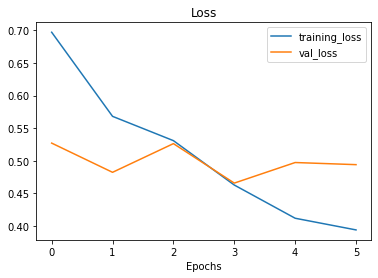

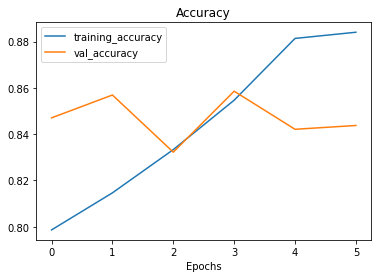

In [88]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [89]:
#lets create a funtion (only been fit. once plt loss curves is good but we need a new one)

def compare_histories(original_history, new_history,initial_epochs=5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc+new_history.history['accuracy']
  total_loss= loss+new_history.history['loss']

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1],
            plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')


  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_acc, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1],
            plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')

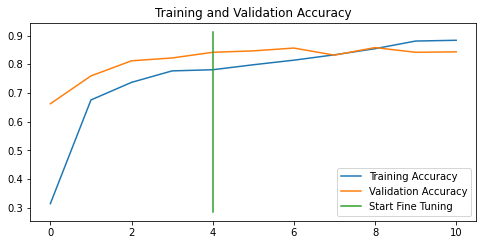

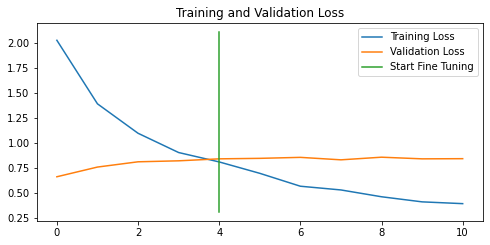

In [90]:
compare_histories(history_10_percent_data_aug,history_fine_10_percent_data_aug,initial_epochs=5)

In [91]:
#MODEL-4: FINE TUNE ON ALL OF THE DATA

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir_all_data = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2021-08-01 09:55:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   247MB/s    in 2.0s    

2021-08-01 09:55:25 (247 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [92]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

In [93]:
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 label_mode='categorical',
                                                                                 image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [94]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 0.4906 - accuracy: 0.8416


[0.4906407594680786, 0.8416000008583069]

In [95]:
results_fine_tune_10_percent

[0.4906407594680786, 0.8416000008583069]

In [96]:
#revert to saved checkpoint to feature extr weights
model_2.load_weights(checkpoint_path)

In [97]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 105ms/step - loss: 0.6895 - accuracy: 0.8208


[0.6894879937171936, 0.8208000063896179]

In [98]:
results_10_percent_data_aug

[0.6894878149032593, 0.8208000063896179]

In [99]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling True
4 output_layer True


In [100]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [101]:
#compile
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [102]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           validation_data=test_data,
                                           validation_steps = int(0.25 * len(test_data)),
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                                  experiment_name='full_10_classes_fine_tune_last_10')])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20210801-095556
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 48s 185ms/step - loss: 0.7207 - accuracy: 0.7704 - val_loss: 0.4143 - val_accuracy: 0.8618
Epoch 6/10
235/235 [==============================] - 54s 227ms/step - loss: 0.5956 - accuracy: 0.8056 - val_loss: 0.3503 - val_accuracy: 0.8799
Epoch 7/10
235/235 [==============================] - 50s 213ms/step - loss: 0.5289 - accuracy: 0.8293 - val_loss: 0.3585 - val_accuracy: 0.8832
Epoch 8/10
235/235 [==============================] - 49s 206ms/step - loss: 0.4755 - accuracy: 0.8479 - val_loss: 0.3612 - val_accuracy: 0.8865
Epoch 9/10
235/235 [==============================] - 49s 205ms/step - loss: 0.4357 - accuracy: 0.8633 - val_loss: 0.3523 - val_accuracy: 0.8849
Epoch 10/10
235/235 [==============================] - 45s 188ms/step - loss: 0.4260 - accuracy: 0.8651 - val_loss: 0.3221 - val_accuracy: 0.8865


In [103]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 9s 109ms/step - loss: 0.3110 - accuracy: 0.8960


[0.3109643757343292, 0.8960000276565552]

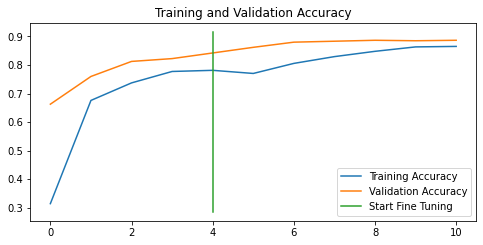

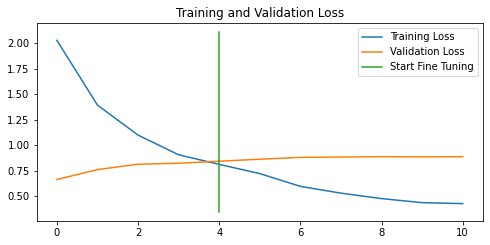

In [104]:
compare_histories(original_history=history_10_percent_data_aug,
                  new_history=history_fine_10_classes_full,
                  initial_epochs=5)

In the end the accuracy imporved by a lot ,

I may or may not have messed up the loss at some point cause the graphs dont add up,
the validation loss is supposed to go down as well seems its overfitting when it really shouldnt 🤷🏾‍♂️

We move on..

In [ ]:
#Tensorboard time

!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer learning experiments" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
  --one_shot

TFBOARD Experiment LINK : https://tensorboard.dev/experiment/DogGQSxVS9G2Ltl9KJLNzA/

In [108]:
!tensorboard dev list

2021-08-01 10:12:34.157410: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
https://tensorboard.dev/experiment/DogGQSxVS9G2Ltl9KJLNzA/
	Name                 Transfer learning experiments
	Description          A series of different transfer learning experiments with varying amounts of data and fine-tuning
	Id                   DogGQSxVS9G2Ltl9KJLNzA
	Created              2021-08-01 10:07:43 (5 minutes ago)
	Updated              2021-08-01 10:07:50 (4 minutes ago)
	Runs                 14
	Tags                 5
	Scalars              228
	Tensor bytes         0
	Binary object bytes  5935748
Total: 1 experiment(s)


In [ ]:
#!tensorboard dev delete --experiment_id .....


-----
------